In [3]:
import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt
from munkres import Munkres
%matplotlib inline

In [4]:
stor={0:'Lannion',1:'Le Havre',2:'Caen',3:'Lille',4:'Orleans', 5:'Besançon',6:'Lyon',7:'Poitiers'}
dest={0:'Paris Nord',1:'Paris Sud',2:'Strasbourg',3:'Nantes',4:'Bordeaux', 5:'Toulouse',6:'Montpellier',7:'Marseille'}
c=np.array([[4.75,4.5,8.5,2.68,5.5,7.5,9.25,10.33],
           [2.125,2.125,5.99,3.65,5.9,7.6,8.16,8.42],
           [2.16,2.13,6.17,2.71,5.2,7.1,7.85,8.5],
           [1.9,2.13,4.68,5.28,7.33,7.96,8.4,8.46],
           [1.6,1.31,5.18,3.05,4.03,4.83,5.41,6.58],
           [3.68,3.42,2.38,6.28,6.63,6.16,4.83,4.86],
           [4.11,3.83,4.28,6.11,4.85,4.7,2.78,2.82],
           [3.35,3.08,7.13,2.,2.28,4.18,6.38,7.78]])

In [9]:
c1=[[4.75,4.5,8.5,2.68,5.5,7.5,9.25,10.33],
           [2.125,2.125,5.99,3.65,5.9,7.6,8.16,8.42],
           [2.16,2.13,6.17,2.71,5.2,7.1,7.85,8.5],
           [1.9,2.13,4.68,5.28,7.33,7.96,8.4,8.46],
           [1.6,1.31,5.18,3.05,4.03,4.83,5.41,6.58],
           [3.68,3.42,2.38,6.28,6.63,6.16,4.83,4.86],
           [4.11,3.83,4.28,6.11,4.85,4.7,2.78,2.82],
           [3.35,3.08,7.13,2.,2.28,4.18,6.38,7.78]]

In [16]:
def solve_assignment(matrix):
    m = Munkres()
    indexes = m.compute(matrix)
    total_cost = sum(matrix[row][col] for row, col in indexes)
    
    assignment_matrix = [[0] * len(matrix) for _ in range(len(matrix[0]))]
    for row, col in indexes:
        assignment_matrix[row][col] = 1
    
    return  indexes, assignment_matrix, total_cost

In [17]:
index, assignment, cost = solve_assignment(c1)

print(index)
print("Assignment Matrix:")
for row in assignment:
    print(row)
print("Total Cost:", cost)

[(0, 3), (1, 0), (2, 1), (3, 2), (4, 5), (5, 7), (6, 6), (7, 4)]
Assignment Matrix:
[0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
Total Cost: 26.365000000000002


In [34]:
assignment_graph = nx.Graph()

In [35]:
for u in index:
    assignment_graph.add_edge(stor[u[0]], dest[u[1]], weight=c1[u[0]][u[1]])  # Add weight attribute

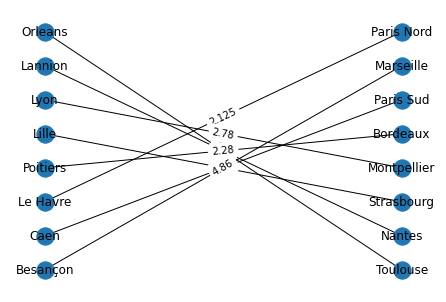

In [36]:
pos = nx.bipartite_layout(assignment_graph, list(stor.values()))
nx.draw(assignment_graph, pos=pos, with_labels=True)
edge_labels = nx.get_edge_attributes(assignment_graph, 'weight')
nx.draw_networkx_edge_labels(assignment_graph, pos=pos, edge_labels=edge_labels)
plt.show()